In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

In [2]:
df = pd.read_csv("SA_icu_final.csv")

In [3]:
df.dtypes

icustay_id                int64
subject_id                int64
hadm_id                   int64
intime                   object
outtime                  object
dbsource                 object
icu_los                 float64
first_careunit           object
admittime                object
dischtime                object
hosp_deathtime           object
admission_type           object
insurance                object
marital_status           object
diagnosis                object
ethnic_group             object
time_spent               object
hospital_expire_flag      int64
gender                   object
dob                      object
dod                      object
expire_flag               int64
age                       int64
days_to_death           float64
event                     int64
diag_category            object
hosp_time_days          float64
dtype: object

In [4]:
df.columns

Index(['icustay_id', 'subject_id', 'hadm_id', 'intime', 'outtime', 'dbsource',
       'icu_los', 'first_careunit', 'admittime', 'dischtime', 'hosp_deathtime',
       'admission_type', 'insurance', 'marital_status', 'diagnosis',
       'ethnic_group', 'time_spent', 'hospital_expire_flag', 'gender', 'dob',
       'dod', 'expire_flag', 'age', 'days_to_death', 'event', 'diag_category',
       'hosp_time_days'],
      dtype='object')

In [5]:
# Dropping irrelevent columns
df = df[['icustay_id', 'subject_id', 'hadm_id', 'dbsource',
       'icu_los', 'first_careunit', 'hosp_deathtime',
       'admission_type', 'insurance', 'marital_status', 'diagnosis',
       'ethnic_group', 'time_spent', 'hospital_expire_flag', 'gender', 'expire_flag', 'age', 'days_to_death', 'event', 'diag_category']].copy()

# 1. Basic Data Overview #

In [6]:
df['event'].value_counts(normalize = True)

event
0    0.607858
1    0.392142
Name: proportion, dtype: float64

In [7]:
df.isna().sum()

icustay_id                  0
subject_id                  0
hadm_id                     0
dbsource                    0
icu_los                     0
first_careunit              0
hosp_deathtime          54795
admission_type              0
insurance                   0
marital_status              0
diagnosis                   4
ethnic_group                0
time_spent                  0
hospital_expire_flag        0
gender                      0
expire_flag                 0
age                         0
days_to_death           37255
event                       0
diag_category               0
dtype: int64

In [8]:
df.duplicated(subset = ['icustay_id']).sum()

np.int64(0)

# 2. Descriptive Statistics #

In [9]:
df['time_spent'] = pd.to_timedelta(df['time_spent'])
df.describe()

,icustay_id,subject_id,hadm_id,icu_los,time_spent,hospital_expire_flag,expire_flag,age,days_to_death,event
count,61289.000000,61289.000000,61289.000000,61289.000000,61289,61289.000000,61289.000000,61289.000000,24034.000000,61289.000000
mean,249967.770595,33895.028162,149957.737816,4.916293,11 days 07:05:53.823687774,0.105957,0.392142,55.560835,497.121370,0.392142
std,28883.260462,28144.970257,28902.797914,9.639993,14 days 05:25:12.260416283,0.307785,0.488232,26.938647,753.963495,0.488232
min,200001.000000,2.000000,100001.000000,0.000100,0 days 00:06:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224952.000000,12029.000000,124934.000000,1.109300,3 days 21:59:00,0.000000,0.000000,44.000000,0.000000,0.000000
50%,249943.000000,24253.000000,149922.000000,2.092300,6 days 22:40:00,0.000000,0.000000,62.000000,122.000000,0.000000
75%,274972.000000,54257.000000,175004.000000,4.477100,13 days 00:48:00,0.000000,1.000000,76.000000,690.000000,1.000000
max,299999.000000,99999.000000,199999.000000,173.072500,294 days 15:51:00,1.000000,1.000000,90.000000,4328.000000,1.000000


In [10]:
pd.crosstab(df['dbsource'],df['event'], normalize = True)

event,0,1
dbsource,,
carevue,0.355219,0.259884
metavision,0.252639,0.132259


<Axes: xlabel='gender'>

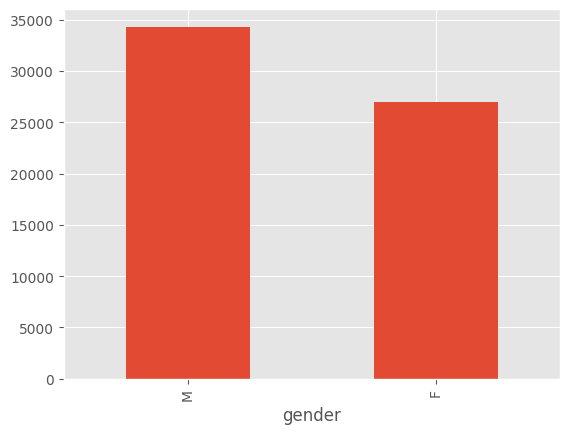

In [11]:
df['gender'].value_counts().plot(kind = 'bar')

In [12]:
categorical_cols = [
    'gender',
    'admission_type',
    'insurance',
    'marital_status',
    'first_careunit',
    'diag_category',
    'ethnic_group'
]


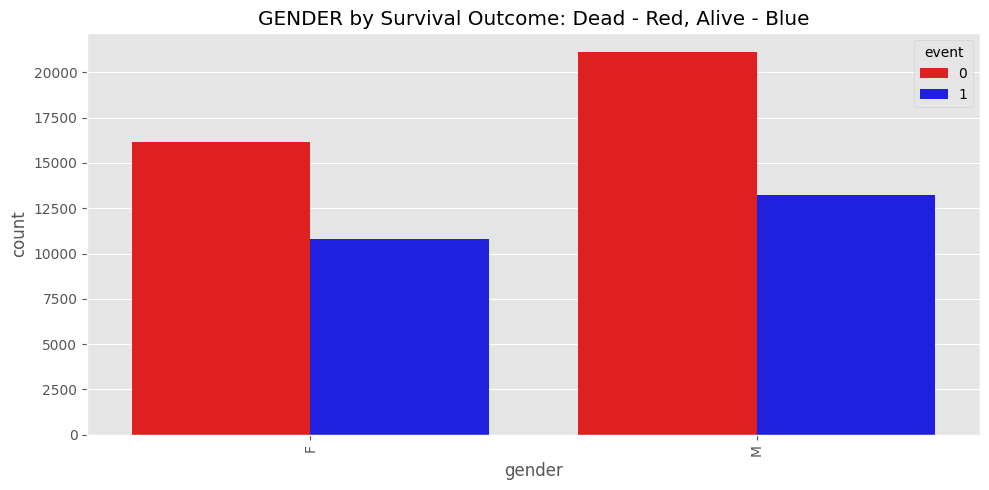

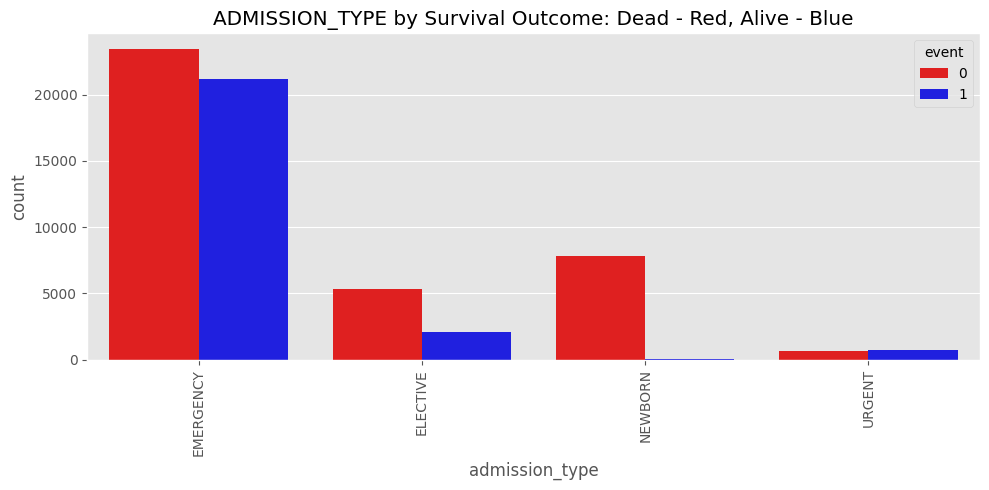

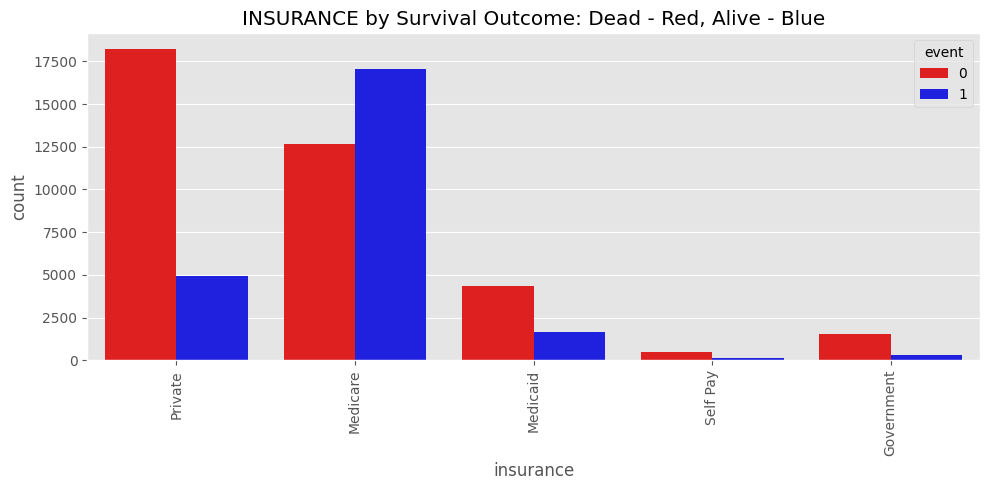

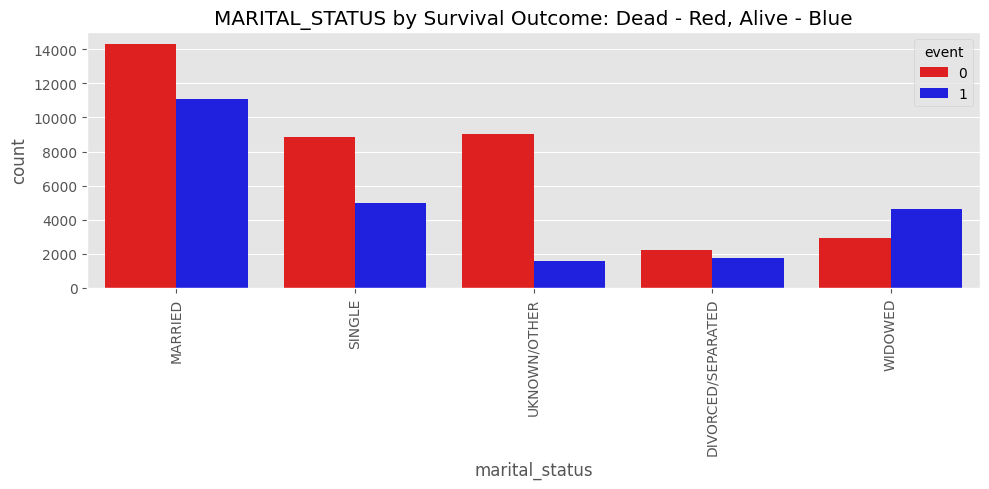

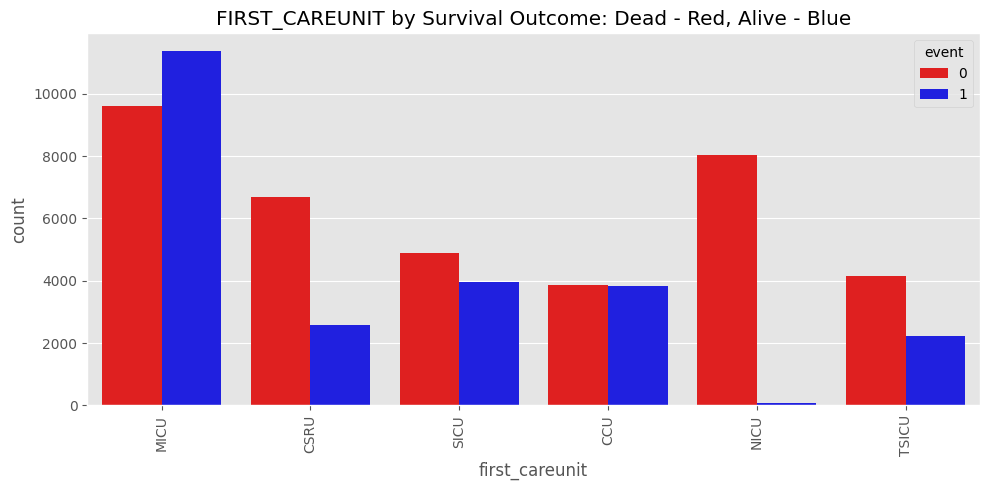

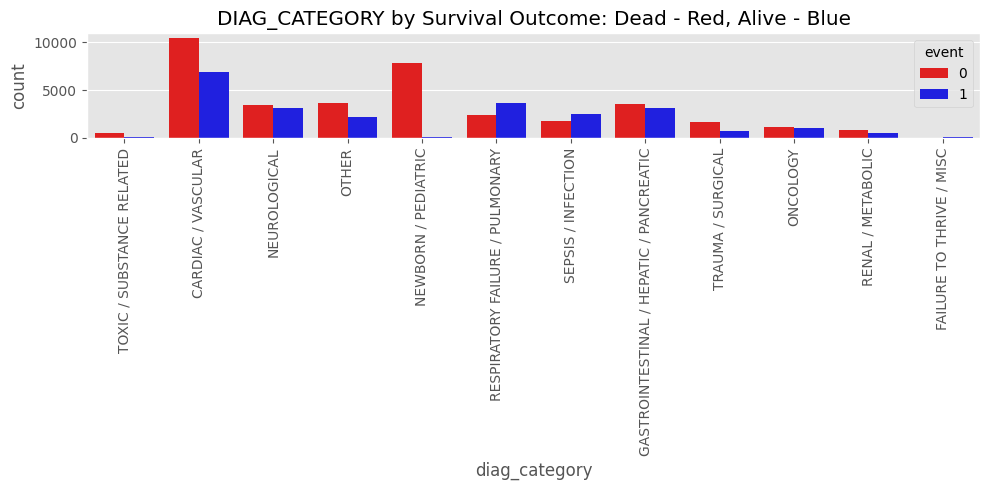

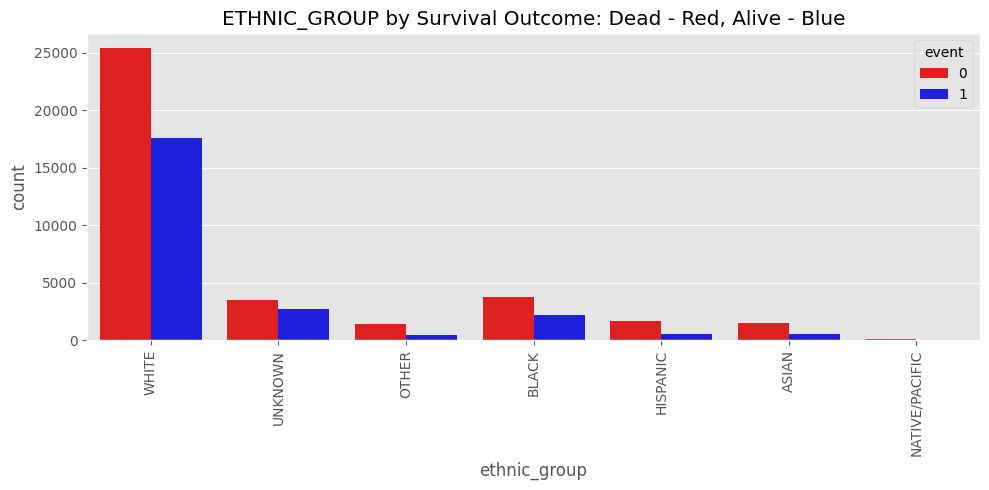

In [13]:
for col in categorical_cols:
    plt.figure(figsize = (10,5))
    sns.countplot(data = df, x = col, hue = 'event', palette = ['red','blue'])
    #df[col].value_counts().plot(kind = 'barh')
    plt.title(f'{col.upper()} by Survival Outcome: Dead - Red, Alive - Blue')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

# 3. Mortality Related EDA #

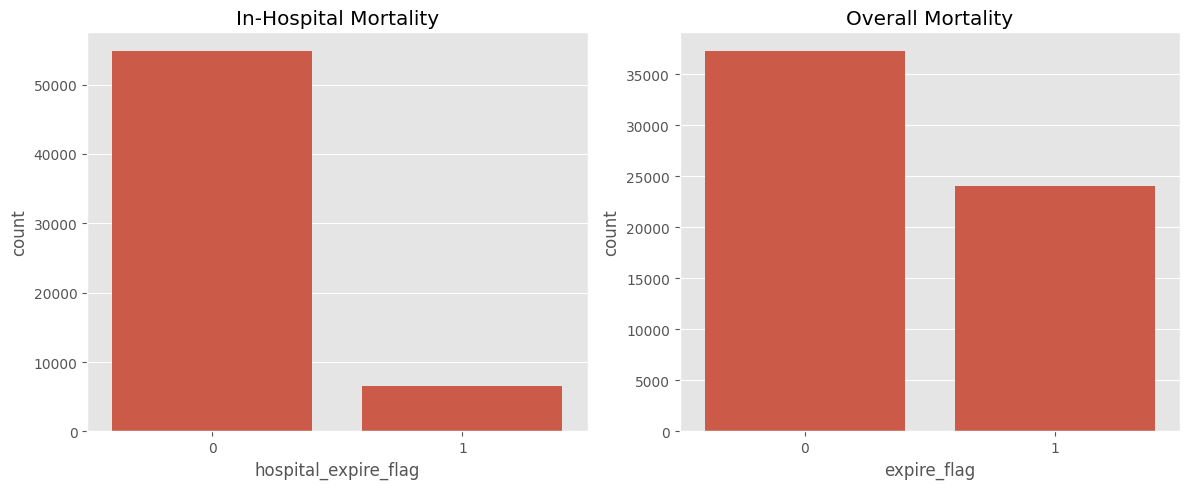

In [14]:
# Mortality Bar Charts
fig, ax = plt.subplots(1, 2, figsize = (12,5))

sns.countplot(data= df, x = "hospital_expire_flag", ax= ax[0])
ax[0].set_title("In-Hospital Mortality")

sns.countplot(data = df, x= "expire_flag", ax = ax[1])
ax[1].set_title("Overall Mortality")

plt.tight_layout()
plt.show()

## Compare Survivors vs Non-Survivors ##

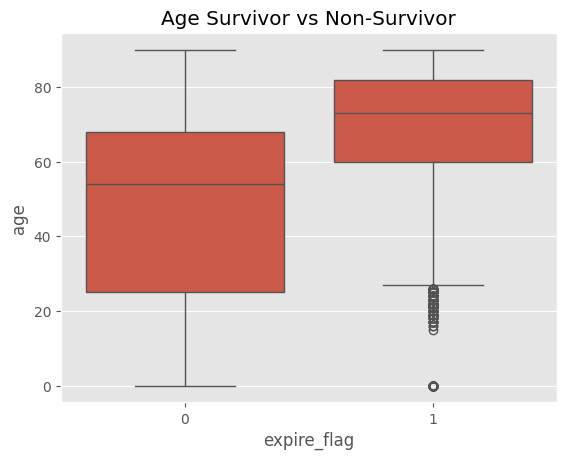

T-test: t= -131.163, p= 0.00000


In [15]:
# AGE — Boxplot + t-test
from scipy import stats

sns.boxplot(data = df, x= 'expire_flag', y = 'age')
plt.title("Age Survivor vs Non-Survivor")
plt.show()

alive = df[df["expire_flag"] ==0]['age']
dead = df[df['expire_flag']==1]['age']

t, p = stats.ttest_ind(alive, dead, equal_var = False)
print(f'T-test: t= {t:.3f}, p= {p:.5f}')

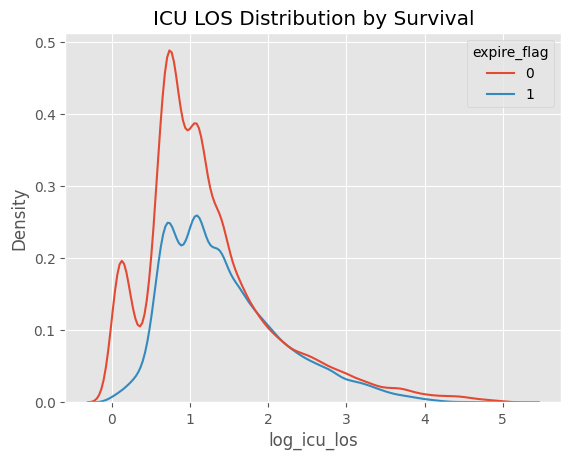

In [16]:
# ICU Length of Stay — Distribution (KDE or histogram)
df['log_icu_los'] = np.log1p(df['icu_los'])
sns.kdeplot(data = df,x = "log_icu_los", hue = 'expire_flag')
plt.title('ICU LOS Distribution by Survival')
plt.show()

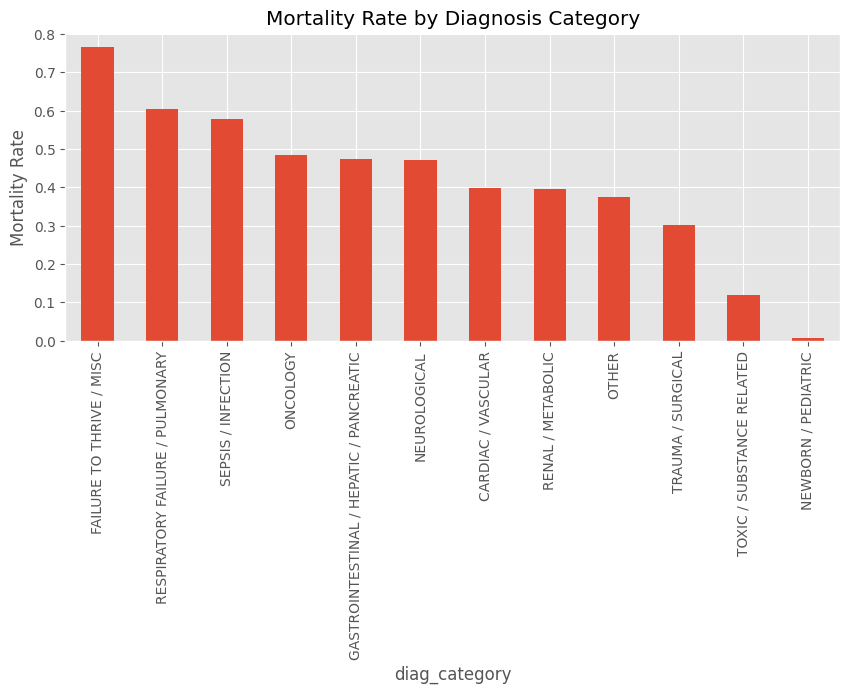

In [17]:
# Diagnosis category — Mortality per category
mortality_by_diag = df.groupby('diag_category')['expire_flag'].mean().sort_values(ascending=False)
mortality_by_diag.plot(kind = 'bar', figsize= (10,4))
plt.title("Mortality Rate by Diagnosis Category")
plt.ylabel("Mortality Rate")
plt.show()

In [18]:
pd.crosstab(df['diag_category'], df['event'], normalize = 'index')*100

event,0,1
diag_category,,
CARDIAC / VASCULAR,60.086430,39.913570
FAILURE TO THRIVE / MISC,23.529412,76.470588
GASTROINTESTINAL / HEPATIC / PANCREATIC,52.620514,47.379486
NEUROLOGICAL,52.752920,47.247080
NEWBORN / PEDIATRIC,99.218750,0.781250
ONCOLOGY,51.550752,48.449248
OTHER,62.376068,37.623932
RENAL / METABOLIC,60.419682,39.580318
RESPIRATORY FAILURE / PULMONARY,39.474554,60.525446


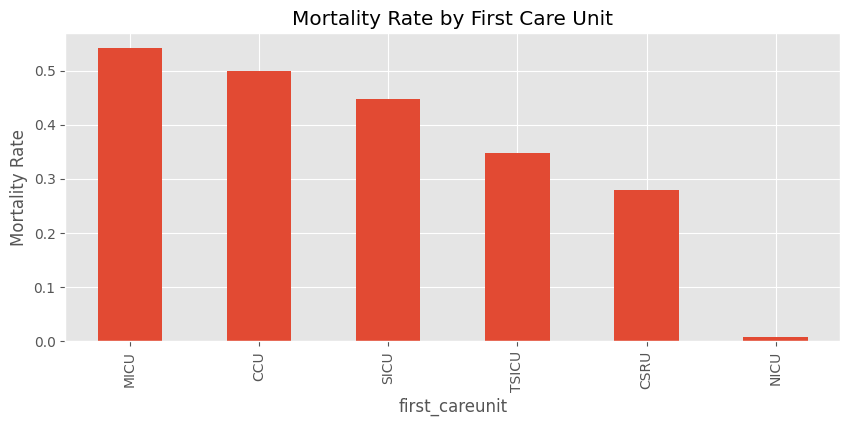

In [19]:
# First care unit — Mortality per unit
mortality_by_unit = df.groupby('first_careunit')['expire_flag'].mean().sort_values(ascending = False)
mortality_by_unit.plot(kind = 'bar', figsize = (10,4))
plt.title("Mortality Rate by First Care Unit")
plt.ylabel("Mortality Rate")
plt.show()

In [20]:
# Validating diagnosis categorization by comparing it against the patient’s admitted first care unit.
pd.crosstab(df['diag_category'], df['first_careunit'], normalize = 'index')*100

first_careunit,CCU,CSRU,MICU,NICU,SICU,TSICU
diag_category,,,,,,
CARDIAC / VASCULAR,28.124460,41.498127,19.948142,0.553155,6.793431,3.082685
FAILURE TO THRIVE / MISC,5.882353,2.352941,58.823529,0.000000,31.764706,1.176471
GASTROINTESTINAL / HEPATIC / PANCREATIC,6.652651,3.258748,56.029434,0.030035,23.366872,10.662262
NEUROLOGICAL,4.914303,2.472319,27.316851,0.045503,44.486577,20.764447
NEWBORN / PEDIATRIC,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
ONCOLOGY,16.964286,18.796992,31.719925,0.046992,21.052632,11.419173
OTHER,7.863248,10.598291,37.299145,0.547009,22.547009,21.145299
RENAL / METABOLIC,8.683068,2.387844,66.787265,0.000000,17.293777,4.848046
RESPIRATORY FAILURE / PULMONARY,11.649042,5.766689,71.397885,0.181758,7.501652,3.502974


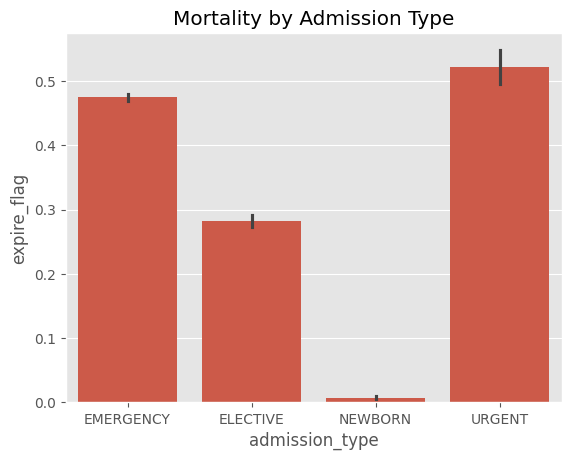

In [21]:
# Admission type — Emergency vs elective mortality
sns.barplot(data = df, x = 'admission_type', y = 'expire_flag')
plt.title("Mortality by Admission Type")
plt.show()

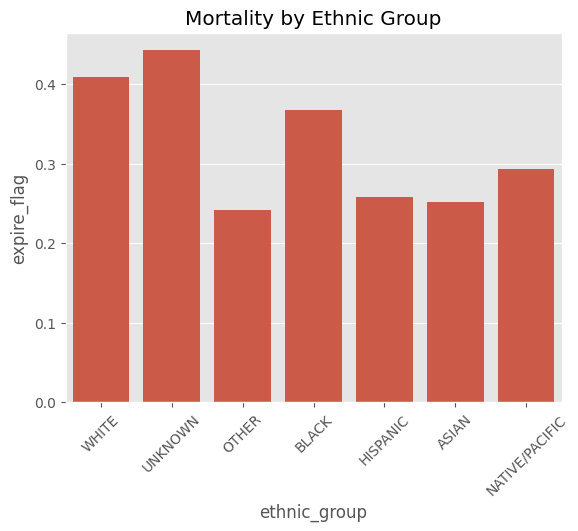

In [22]:
# Ethnic group — Mortality differences
sns.barplot(data = df, x = 'ethnic_group', y = 'expire_flag', errorbar = None)
plt.title('Mortality by Ethnic Group')
plt.xticks(rotation = 45)
plt.show()

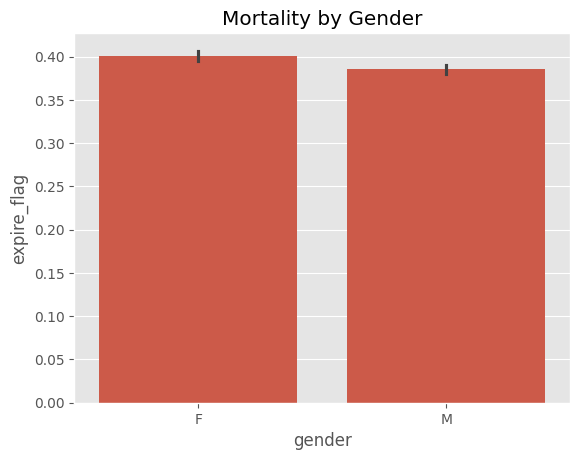

In [23]:
# Gender — small expected differences
sns.barplot(data=df, x='gender', y='expire_flag')
plt.title("Mortality by Gender")
plt.show()


# 4. ICU & Hospital Stay Analysis #

## ICU Length of Stay (LOS) ##

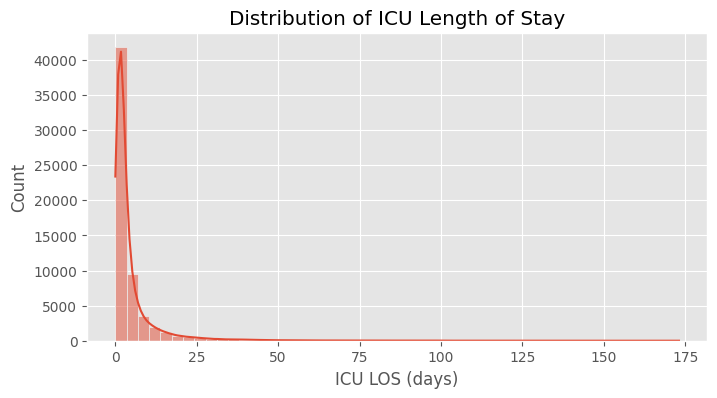

In [24]:
# Distribution of ICU LOS
plt.figure(figsize=(8,4))
sns.histplot(df['icu_los'], bins=50, kde=True)
plt.title("Distribution of ICU Length of Stay")
plt.xlabel("ICU LOS (days)")
plt.ylabel("Count")
plt.savefig("EDA/hist_iculos_distribution.png", dpi=300, bbox_inches='tight') 
plt.show()

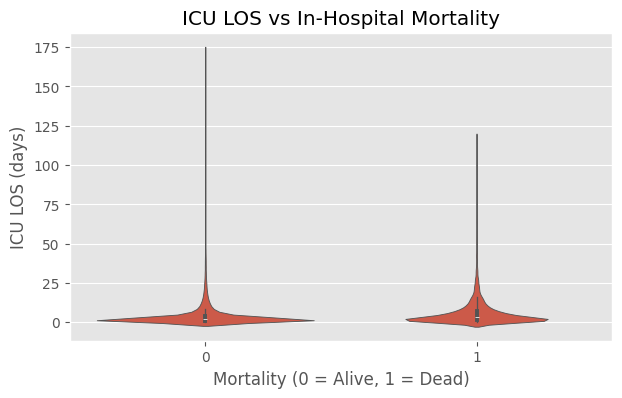

In [25]:
# ICU LOS vs Mortality
plt.figure(figsize = (7,4))
sns.violinplot(data = df, x = 'hospital_expire_flag', y = 'icu_los')
plt.title("ICU LOS vs In-Hospital Mortality")
plt.xlabel("Mortality (0 = Alive, 1 = Dead)")
plt.ylabel("ICU LOS (days)")
plt.show()

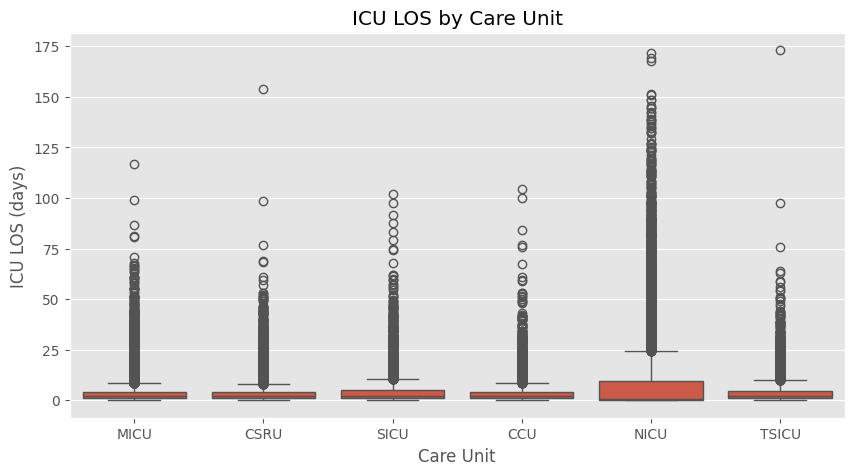

In [26]:
# ICU LOS vs Care Unit
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = 'first_careunit', y = 'icu_los')
plt.title("ICU LOS by Care Unit")
plt.xlabel("Care Unit")
plt.ylabel("ICU LOS (days)")
plt.savefig("EDA/box_ICUlosvsUNIT.png", dpi=300, bbox_inches='tight') 
plt.show()

## Hospital LOS (time_spent) ##

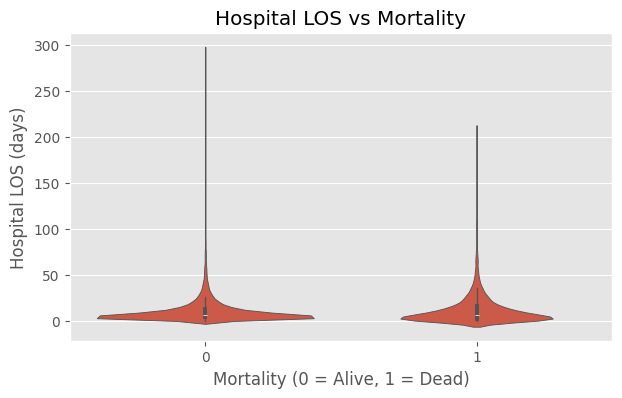

In [27]:
# Hospital LOS vs Mortality
df['time_spent'] = pd.to_timedelta(df['time_spent'])
df['time_spent_days'] = df['time_spent'].dt.total_seconds() / (24 * 3600)

plt.figure(figsize=(7,4))
sns.violinplot(data=df, x='hospital_expire_flag', y='time_spent_days')
plt.title("Hospital LOS vs Mortality")
plt.xlabel("Mortality (0 = Alive, 1 = Dead)")
plt.ylabel("Hospital LOS (days)")
plt.show()


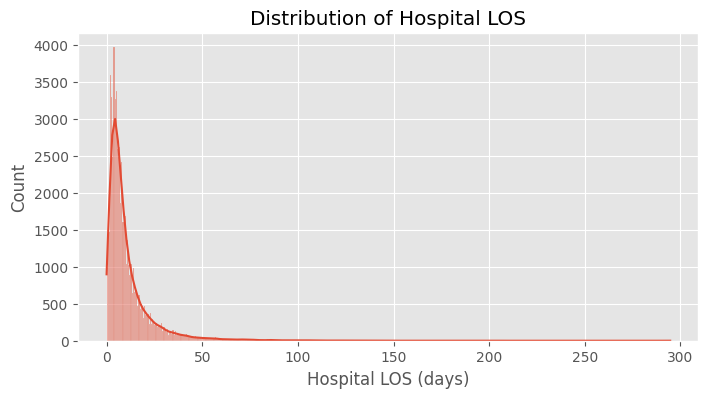

In [28]:
# Distribution of Hospital LOS
plt.figure(figsize = (8,4))
sns.histplot(df["time_spent_days"], kde = True)
plt.title("Distribution of Hospital LOS")
plt.xlabel("Hospital LOS (days)")
plt.savefig("EDA/hist_hosplos_distribution.png", dpi=300, bbox_inches='tight') 
plt.show()

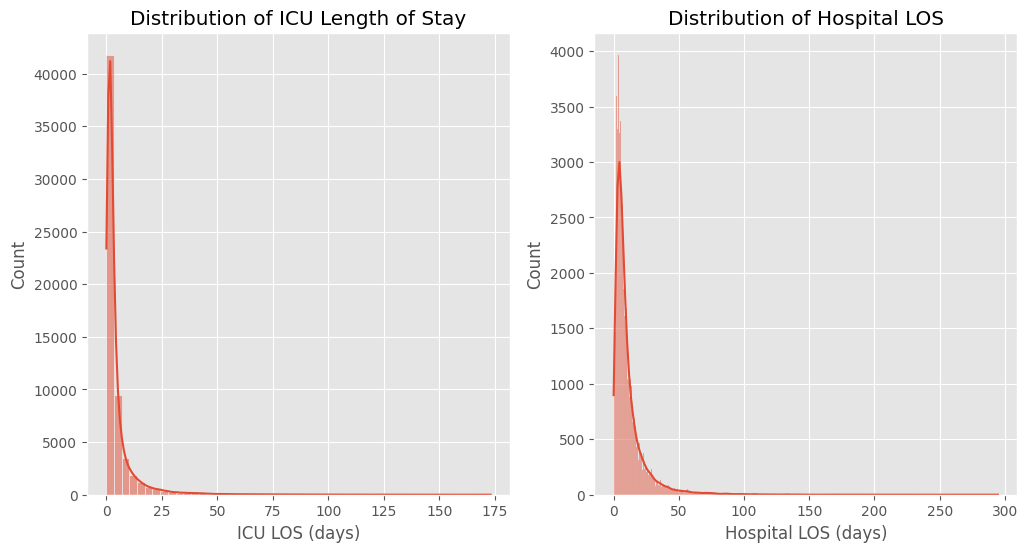

In [29]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

# Distribution of ICU LOS
sns.histplot(df['icu_los'], bins=50, kde=True, ax = ax[0])
ax[0].set_title("Distribution of ICU Length of Stay")
ax[0].set_xlabel("ICU LOS (days)")
ax[0].set_ylabel("Count")

# Distribution of Hospital LOS
sns.histplot(df["time_spent_days"], kde = True, ax = ax[1])
ax[1].set_title("Distribution of Hospital LOS")
ax[1].set_xlabel("Hospital LOS (days)")

plt.savefig("EDA/hist_iculosVShosp_distribution.png", dpi=300, bbox_inches='tight') 
plt.show()

# 5. Interaction Plots #

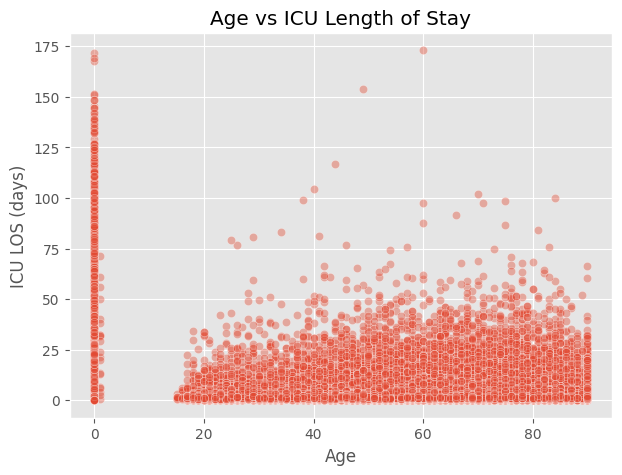

In [30]:
# Age × ICU LOS
plt.figure(figsize = (7,5))
sns.scatterplot(data = df, x = 'age', y = 'icu_los', alpha = 0.4)
plt.title("Age vs ICU Length of Stay")
plt.xlabel("Age")
plt.ylabel("ICU LOS (days)")
plt.show()

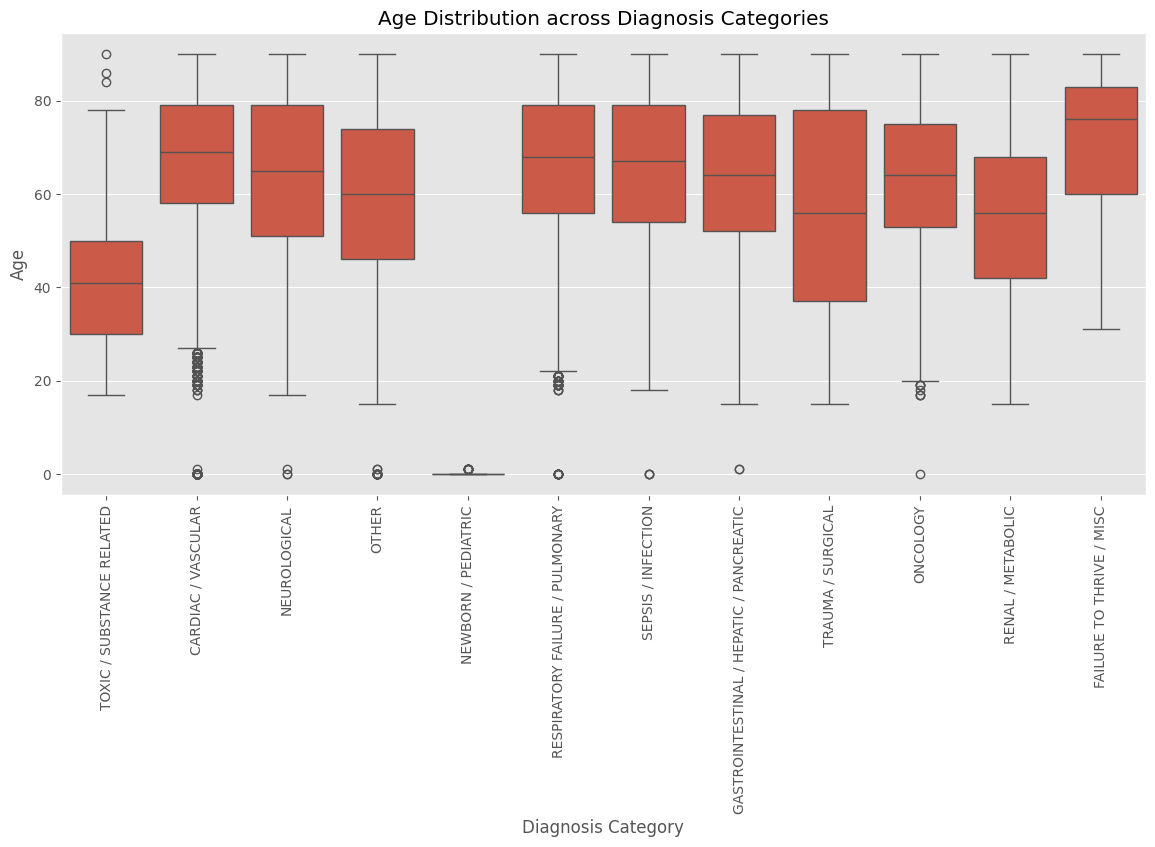

In [31]:
# Diagnosis Category × Age
plt.figure(figsize = (14,6))
sns.boxplot(data = df, x = "diag_category", y = 'age')
plt.xticks(rotation = 90)
plt.title("Age Distribution across Diagnosis Categories")
plt.xlabel("Diagnosis Category")
plt.ylabel("Age")
plt.savefig("EDA/box_diagVSage.png", dpi=300, bbox_inches='tight') 
plt.show()